In [68]:
import os, sys,z5py
import numpy as np
import pandas as pd
from glob import glob 
from skimage.io import imread, imsave
from os.path import abspath, dirname
sys.path.append("/Users/wangy6/Desktop/DATA/Codes/Python/n5_cut tiles/")
import n5_metadata_utils as n5mu

In [69]:
%gui qt
from skimage import data
import napari
napari.gui_qt()
viewer = napari.Viewer(ndisplay=3)

In [136]:
###Input information here: cell ID, image volume size, channels###
channel_1='c1'
channel_2=''
imdir="/Volumes/multifish/Yuhan/LHA3/register/reR9_LHA3/warped/"
spotdir='/Volumes/multifish/Yuhan/LHA3/analysis/spot/2_inMask/R9_c1_crop.txt'
di=1000
#imdir='/Volumes/multifish/Yuhan/LHA3/stitch/R3_LHA3/export.n5/'
#lbdir=

In [125]:
spot=np.loadtxt(spotdir)

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

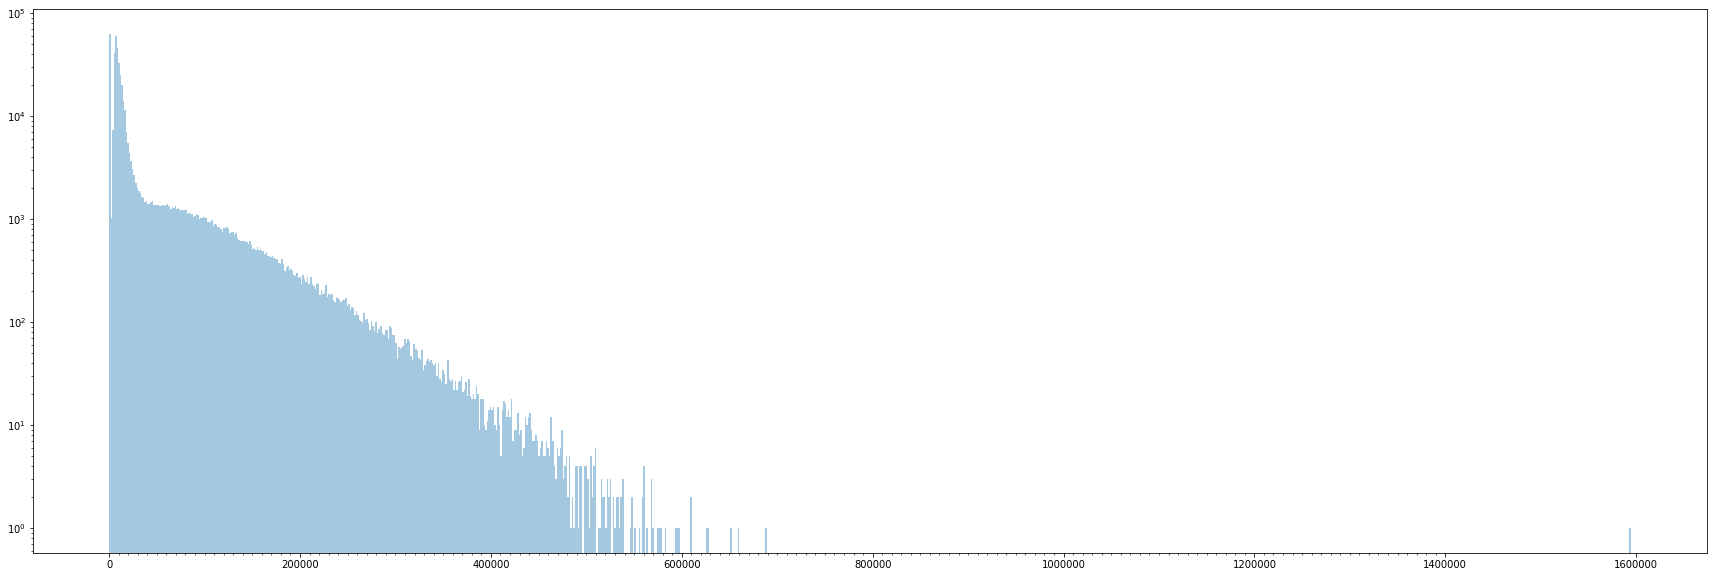

In [126]:
plt.clf()
plt.figure(figsize=(30,10));
a=sns.distplot(spot[:,3],bins=1000,kde=False)
a.set_yscale('log')
a.set_xticks(ticks=range(0,1400000,10000),minor=True)

In [127]:
intensity=200000
di=100
select=spot[np.logical_and(spot[:,3]<=intensity+di,spot[:,3]>intensity-di)]




In [128]:
select.shape

(27, 4)

In [129]:
z=select[2,2]
y=select[2,1]
x=select[2,0]
Z=int(np.floor(z))
Y=int(np.floor(y))
X=int(np.floor(x))
dz=50
dy=100
dx=100

In [21]:
z

101.96395465760997

In [137]:
# get n5 image data for channel 1
im = z5py.File(imdir, use_zarr_format=False)       
img_1 = im[channel_1+'/s2'][Z-dz:Z+dz,Y-dy:Y+dy,X-dx:X+dx]
viewer.add_image(img_1.astype('float32'),colormap='green',blending='additive')

<Image layer 'Image [3]' at 0x1c34eca150>

In [131]:
z0=z-Z+dz
y0=y-Y+dy
x0=x-X+dx
a=np.array([[z0],[y0],[x0]])
a=np.transpose(a)
viewer.add_points(a, size=1, face_color='red',edge_color='red')

<Points layer 'Points' at 0x1c3cb15310>

In [132]:
###show spot count###
b=spot[np.logical_and(spot[:,0]<=X+dx,spot[:,0]>X-dx)]
b=b[np.logical_and(b[:,1]<=Y+dy,b[:,1]>Y-dy)]
b=b[np.logical_and(b[:,2]<=Z+dz,b[:,2]>Z-dz)]
bx=b[:,0]-X+dx
by=b[:,1]-Y+dy
bz=b[:,2]-Z+dz
point=np.stack((bz,by,bx),axis=-1)
viewer.add_points(point, size=1, face_color='red',edge_color='red')

<Points layer 'Points [1]' at 0x1c442e0290>

In [61]:
# get n5 image data for channel 2
if channel_2!='':
    im = z5py.File(imdir, use_zarr_format=False)    
    img_2 = im[channel_2+'/s2'][Z-dz:Z+dz,Y-dy:Y+dy,X-dx:X+dx]
    viewer.add_image(img_2.astype('float32'),colormap='magenta',contrast_limits=(50,500),blending='additive')

In [111]:
#### Optional:read in segmentation masks#### 
lb=imread("/Volumes/multifish/Yuhan/LHA3/segmentation/R3_label_affinity.tif")
nCells = np.max(lb)
print(nCells)

24201


In [133]:
lb_sub=lb[Z-dz:Z+dz,Y-dy:Y+dy,X-dx:X+dx]
viewer.add_image(lb_sub.astype('float32'),blending='additive')



<Image layer 'Image [1]' at 0x1c3cb20050>